# Introduction
At this experiment we do cross-validation for model initialized and learned on 2020-01-02 day data and test it on other 5 days.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import load
import os 
os.chdir('../..')

In [2]:
similarity = 90
height, width = 10, 5
window = 5
periods = range(5, 11)

Qmatrix_init = load(open(f'src/SPY_patterns_scanner/output/90/5x10/cross_valid/Q_matrix_win5_10_cv.pkl', 'rb'))

pl_cols = [col for col in Qmatrix_init.columns if 'pl' in col]

buy_cols = [col for col in Qmatrix_init.columns if 'buy' in col]
hold_cols = [col for col in Qmatrix_init.columns if 'hold' in col]
sell_cols = [col for col in Qmatrix_init.columns if 'sell' in col]

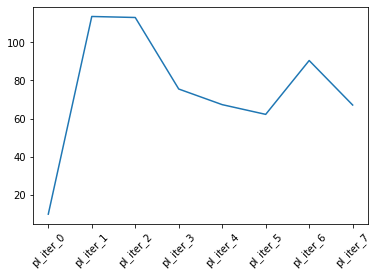

In [3]:
Qmatrix_init[pl_cols].sum().plot(rot=45);

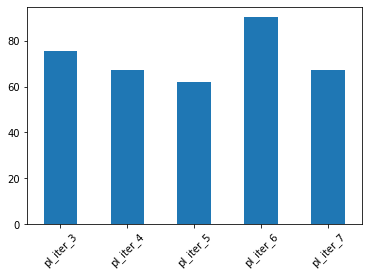

In [4]:
pl_cols_test = pl_cols[3:]
Qmatrix_init[pl_cols_test].sum().plot.bar(x=pl_cols_test, rot=45);

In [6]:
Qmatrix_init[pl_cols].sum()

pl_iter_0      9.83
pl_iter_1    113.52
pl_iter_2    112.99
pl_iter_3     75.47
pl_iter_4     67.27
pl_iter_5     62.17
pl_iter_6     90.42
pl_iter_7     67.07
dtype: float64

In [7]:
Qmatrix_init[pl_cols].sum().max()

113.52000000000129

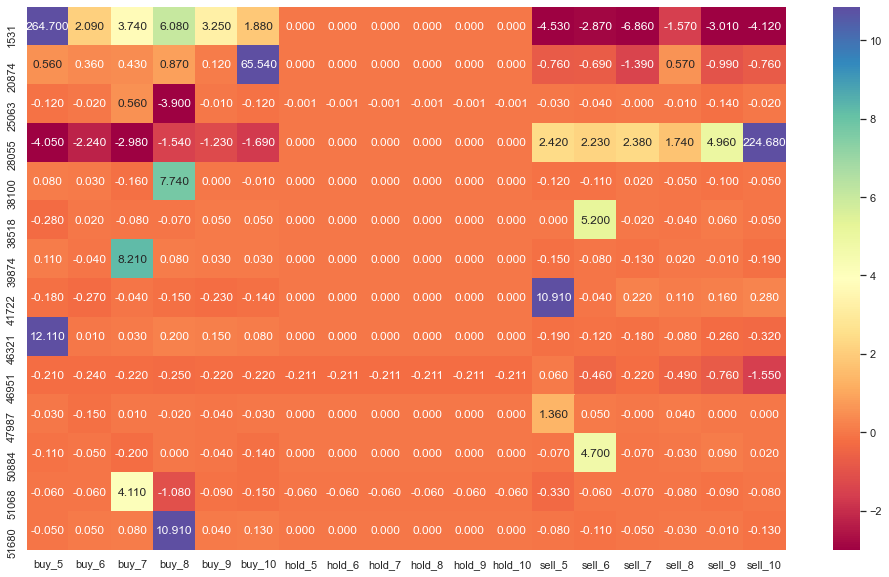

In [19]:
sns.set(rc={'figure.figsize':(17,10)})
sns.heatmap(Qmatrix_init[buy_cols + hold_cols + sell_cols], annot=True, cmap="Spectral", fmt='.3f', robust=True);

In [8]:
pl = []
for i in range(1, 6):
    Qmatrix = load(open(f'src/SPY_patterns_scanner/output/90/5x10/initialized_matrices/Q_matrix_win5_10_{i}.pkl', 'rb'))
    pl.append(Qmatrix['pl_iter_2'].sum())
# pd.Series(pl).plot.bar(x=pl_cols_test, rot=45);

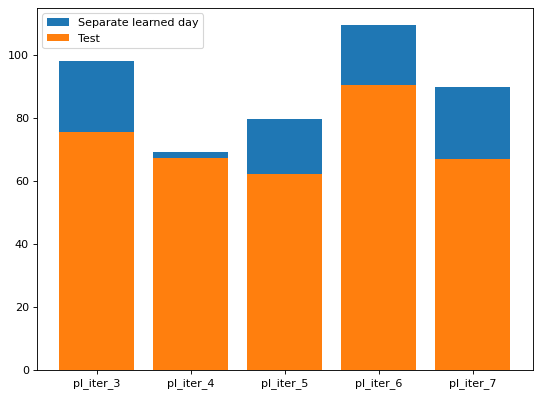

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(height=pd.Series(pl), x=pl_cols_test)
plt.bar(height=Qmatrix_init[pl_cols_test].sum(), x=pl_cols_test)
plt.legend(['Separate learned day', 'Test'])
plt.show()

### PL for every pattern

In [23]:
pd.concat([Qmatrix_init[pl_cols_test].sum(axis=1), Qmatrix_init['prototype']], axis=1)

,0,prototype
1531,146.42,5
20874,42.98,6
25063,-3.81,7
28055,130.64,8
38100,6.15,16
38518,5.09,17
39874,6.37,18
41722,6.70,19
46321,10.29,31
46951,-2.60,32


# Conclusion
As you can see on figure the model brings profit on every test. It is strange that the patterns that bring the maximum profit look like a wave and do not have a clear trend. To test it, we will create patterns of 6 prices and evaluate their forecast.